# Intro
The basic idea is that you can find the probabilities by simulating outcomes with a computer. For example, if you are rolling 5 dice, what is the probability that those dice will sum to 25? If you are good at probability, you may be able to quickly find all the ways you can get a sum of 25 out of all the possible outcomes. If you're not, or even if you are, letting a computer do the work for you is probably easier. This blog discusses the basic idea of simulated outcomes and gives several examples in Python.

# numpy.random

How do you simulate randomness? It is a bit weird if I ask a computer to give me a random number, isn't it? How do I know that number is truly random and not the outcome of a program that is entirely predictable? Well, the numpy generator we are going to use is *not* truly random. It is pseudo-random. Most random number generators are. This means that, depending on the seed we use, we will be given a list of random numbers that were determined in advance. It's like someone already rolled the dice for us many many times and wrote down every result. This list is finite and if you get to the end, the list will just start over again. These lists are usually very long though and will definitely suffice for our simulations. So it is not truly random because a) every outcome has been predetermined and b) eventually a pattern will emerge because it just loops around when you get to the end. 

There is more about this here: [https://www.random.org/randomness/](https://www.random.org/randomness/)  

The website also offers truly random data based on atmospheric noise. 

Ok, carrying on. The generator we will be using is from [numpy](https://numpy.org/). First we seed the random number generator and then use ``np.random.rand()`` to generate a single number. This will generate a float number between 0 and 1. If you want to generate more than one number, you can pass a number into the parentheses. For example to generate 10 numbers like this you could write ``np.random.rand(10)``. This number generator samples from a uniform distribution as shown below.

 

In [74]:
!pwd

/Users/timchristy/Desktop/Blogs


0.771320643266746


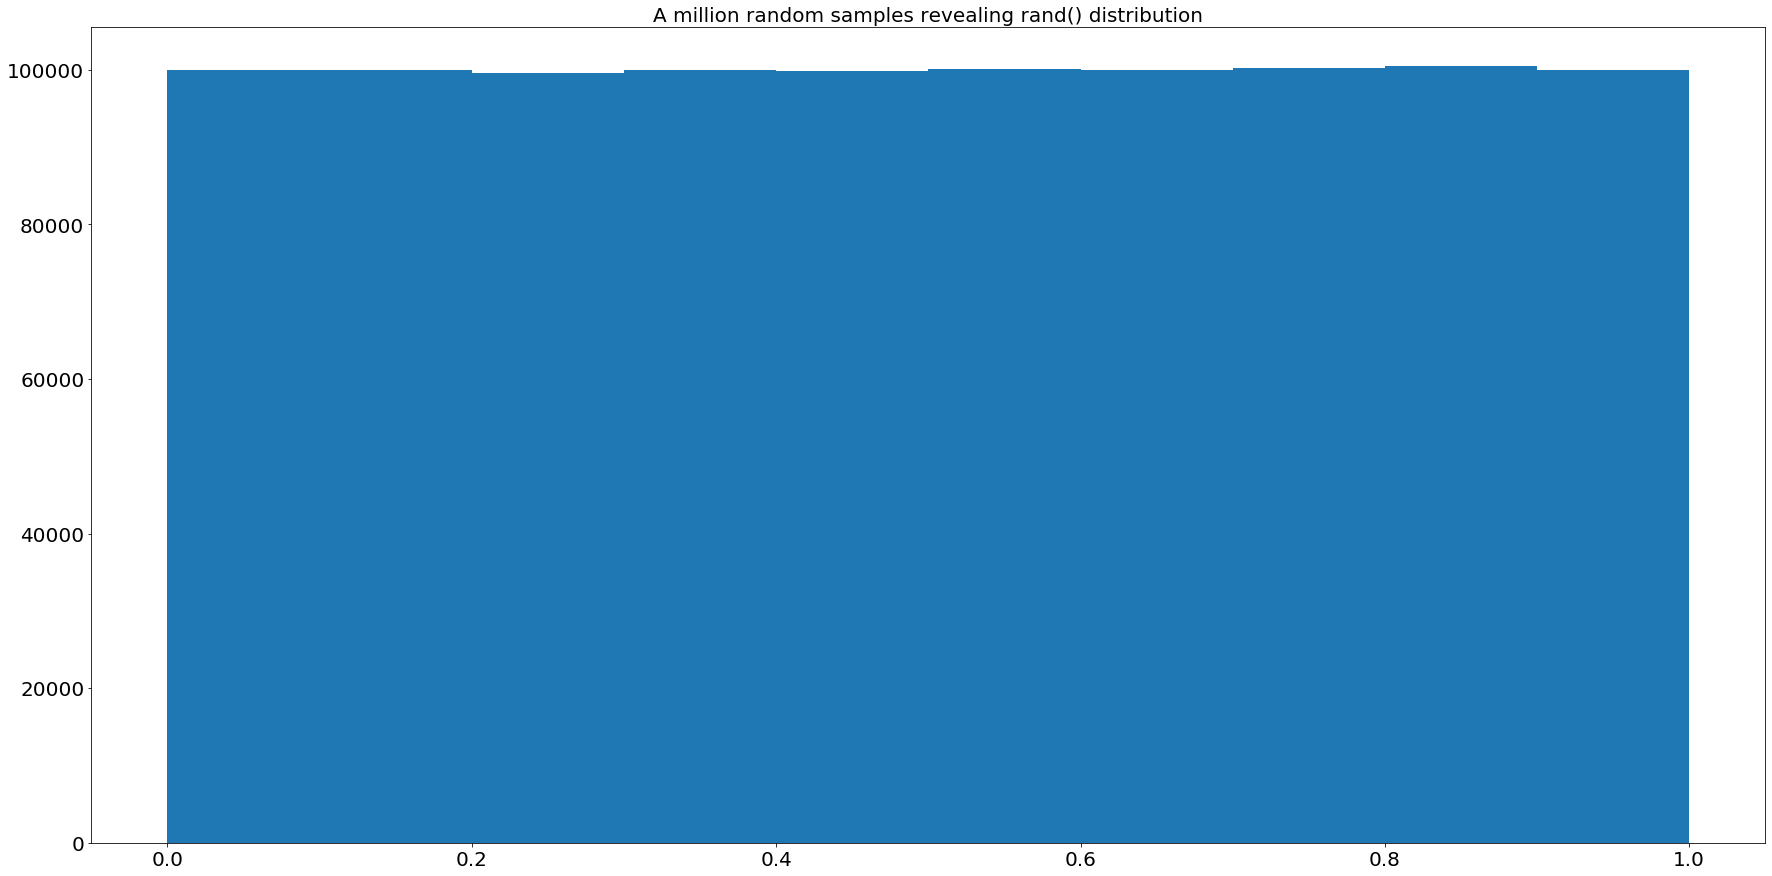

In [76]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

print(np.random.rand()) # single random number

plt.figure(figsize=(30,15))
plt.title('A million random samples revealing rand() distribution', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.hist(np.random.rand(1_000_000)); # What 1000000 points of the distribution looks like from which this number came
plt.savefig('../rand_dist.png')

# Simulating coin flips

Alright, since we know that all numbers between 0 and 1 are equally likely with our number generator, we can say that anything that is below 0.5 is tails and anything above is heads. Knowing this, what then is the probability of getting two heads in two flips? Via theory, the probability is $\frac{1}{4}$ (HH, HT, TH, TT; i.e., one out of four possible outcomes). Let's see if we can get the same result.

In [24]:
# Start a list to keep track of head count
heads = []

# Run the experiment 1_000_000 times (1_000_000 trials)
for _ in range(1_000_000):
    
    # Flip the coin twice
    toss1 = np.random.rand() > 0.5
    toss2 = np.random.rand() > 0.5
    
    # If they both come up heads, count it in the list
    if (toss1+toss2) == 2:
        heads.append(1)

# Print the probability
print(f'Probability: {sum(heads)/1_000_000}')


Probability: 0.250113


That's pretty close! A difference of 0.000113. Note that toss1 and toss2 are boolean values and that I can use the condition ``toss1 + toss2 == 2`` in the if statement because when summed, True evaluates to a 1 and False evaluates to a 0.  


# Rolling Dice
Alright, coin flips are a little boring, how about the dice example above? For that we can use ``np.random.choice()``. What this function does is it randomly chooses an element from a list that is placed in it. So we can make a list of possible outcomes for a die (i.e. ``die_roll = [1, 2, 3, 4, 5, 6]``) and use ``np.random.choice(die_roll)`` to roll the dice. Below I use a list comprehension to record the die outcomes. They are a bit faster and less cumbersome looking than a regular loop.

In [30]:
die_roll = [1, 2, 3, 4, 5, 6]
outcome = []
sums = []


for trial in range(1_000_000):
    
    outcome = [np.random.choice(die_roll) for _ in range(5)]
    sums.append(sum(outcome) == 25)
    
print(f'Probability: {sum(sums)/1_000_000}')


Probability: 0.016013


In [31]:
# Actual probability
7/432

0.016203703703703703

# Poker
For this simulation, we can change our approach a little. Using ``itertools`` we can access the product function, which creates the Cartesian product between the two lists passed into it. So we can pass all a list of suits and a list of numbers and it will return all combinations of the two, building our full deck much more quickly than writing out each individual card.  

From this we can work with sets. What is nice about sets is that order does not matter. Two sets are equal so long as they contain the same elements. This is useful in simulating poker hands because it doesn't matter what order the cards came to you, a royal flush is a royal flush. To make a list into a set you can simply use the ``set()`` function, passing the list into the argument. This will create a set object. Two sets can be compared and shown to be equal by means of a boolean comparison. That is ``set1 == set2`` will return True if they contain the same elements, regardless of order.   

In order to select 5 cards from the deck, ``random`` is imported so that we can use ``sample()``. This function takes two arguments, the first is the set or list from which you want to randomly sample, and the second is the number of elements you would like to randomly sample. So if we have a set called ``deck_of_cards``, and we want to draw 5 cards we can write ``random.sample(deck_of_cards, 5)`` to randomly sample 5 cards.  

Simulation is below.

In [55]:
import itertools # Cartesian product builds the deck
import random # Used to sample from deck

# Building the deck
deck_of_cards = set([card for card in itertools.product([2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K', 'A'],
                                                        ['H', 'S', 'C', 'D'])])

# Defining sets that are Royal Flushes
RF_hearts = set([(10, 'H'), ('J', 'H'), ('Q', 'H'), ('K', 'H'), ('A', 'H')])
RF_spades = set([(10, 'S'), ('J', 'S'), ('Q', 'S'), ('K', 'S'), ('A', 'S')])
RF_clubs = set([(10, 'C'), ('J', 'C'), ('Q', 'C'), ('K', 'C'), ('A', 'C')])
RF_diamonds = set([(10, 'D'), ('J', 'D'), ('Q', 'D'), ('K', 'D'), ('A', 'D')])

# Randomly sampling 5 cards from the deck one million times. If the 5 cards turn out to be any kind of 
# royal flush, True is returned. This list can then be summed to see how many times a royal flush occurred.
RFs = [(set(random.sample(deck_of_cards, 5)) == RF_hearts) | 
       (set(random.sample(deck_of_cards, 5)) == RF_spades) | 
       (set(random.sample(deck_of_cards, 5)) == RF_clubs) | 
       (set(random.sample(deck_of_cards, 5)) == RF_diamonds) 
       for _ in range(1_000_000)]

# Probability of getting a royal flush via simulation
sum(RFs)/1_000_000 # Two in a million



# Last Thoughts  

Here were some relatively simple simulations to demonstrate how you can find probabilities. As seen above, it really comes down to figuring out how to simulate one random trial and then repeating that process many many times. The probability of an outcome is then the number of times the outcome occurred in the simulation divided by the total number of trials. Although the probabilities are often not exactly equal to the theoretical probabilities, depending on the number of trials you run, they can get very close so that the error is negligible. The idea is that if you could run an infinite number of trials you would converge to the exact theoretical probability. More trials are usually better; though not necessarily.